# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**IMPORTANT:**  
This notebook was AI-generated and has not been fully reviewed by a human.  
**Please exercise caution when interpreting the code, comments, or scientific results.  
Verify analysis steps and outputs before drawing firm conclusions.**

[Dandiset 001354 (version 0.250312.0036) - View on DANDI Archive](https://dandiarchive.org/dandiset/001354/0.250312.0036)

## Overview

**Title:** Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation  
**Citation:** Klein, Peter (2025) ... [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001354/0.250312.0036  
**Contributors:** Klein, Peter; National Institute of Mental Health; Phil and Penny Knight Initiative for Brain Resilience; National Cancer Institute  
**Keywords:** CA1, PAGER, Chemogenetics, Antigen-gated  
**Description:**  
This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected using AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded after DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

**What you will learn in this notebook:**  
- How to connect to the DANDI Archive and fetch dataset metadata  
- How to list available NWB files  
- How to load and inspect a NWB file for intracellular electrophysiology  
- How to access and visualize experimental traces and stimulus waveforms  
- How to interpret the structure of the data and plot meaningful responses

## Packages required
- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib

*All packages are assumed to be installed. Do **not** use `pip install` in this notebook.*

In [1]:
# Connect and list some assets for Dandiset 001354
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

assets = dandiset.get_assets()
print("\nFirst 5 assets in this Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036

First 5 assets in this Dandiset:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97)


## Example NWB file

For this analysis, we select the following NWB file as an example:

**Path:** `sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`  
**DANDI Asset ID:** `8609ffee-a79e-498c-8dfa-da46cffef135`  
**Download URL:**  
https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/

[View this file on neurosift.app](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=draft)

We will load and analyze this file below.

In [2]:
# Load the NWB file (streaming from DANDI)
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB file loaded. Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Subject ID:", getattr(nwb.subject, 'subject_id', 'N/A'))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded. Session description: Intracellular electrophysiology experiment.
Identifier: pk2024_07_17_0001
Session start time: 2024-07-17 15:08:30-07:00
Subject ID: PK-109


## Structure summary for this NWB file

The file contains detailed intracellular electrophysiology data including:

- **Acquisition**:  
  Contains many `CurrentClampSeries` objects labeled as `current_clamp-response-XX-ch-YY`
- **Stimulus**:  
  Contains matching `CurrentClampStimulusSeries` named `stimulus-XX-ch-YY`
- **Electrodes and Device**:  
  Two electrodes (0 and 1); a single `Device`
- **Subject Metadata**:  
  | Field                  | Value                   |
  |------------------------|-------------------------|
  | subject_id             | PK-109                  |
  | age reference          | birth                   |
  | sex                    | F                       |
  | species                | Mus musculus            |
  | targeted_layer         | CA1                     |

- **Recording Table:**  
  624 intracellular recordings (rows), grouped in a sequential protocol.

- **Example tree (abridged):**

```
/acquisition
  current_clamp-response-01-ch-0     (CurrentClampSeries)
  current_clamp-response-02-ch-0     (CurrentClampSeries)
  ...
/stimulus
  stimulus-01-ch-0                   (CurrentClampStimulusSeries)
  stimulus-02-ch-0                   (CurrentClampStimulusSeries)
  ...
/general
  /devices
  /intracellular_ephys
/subject, /lab_meta_data, etc.
```

## Exploring recording and stimulus series available

In [3]:
# Show names and shapes for the first 5 acquisition and stimulus entries
def print_series_info(dset, n=5):
    print(f"{'Name':40s} {'Type':32s} {'Shape':15s} {'Unit'}")
    for i, k in enumerate(dset):
        obj = dset[k]
        dtype = type(obj).__name__
        shape = getattr(obj, 'data', None)
        if hasattr(shape, 'shape'):
            shape = str(shape.shape)
        else:
            shape = "-"
        unit = getattr(obj, 'unit', '-')
        print(f"{k:40s} {dtype:32s} {shape:15s} {unit}")
        if i+1 >= n:
            break

print("Acquisition (first 5):")
print_series_info(nwb.acquisition)
print("\nStimulus (first 5):")
print_series_info(nwb.stimulus)

Acquisition (first 5):
Name                                     Type                             Shape           Unit
current_clamp-response-01-ch-0           CurrentClampSeries               (100000,)       volts
current_clamp-response-01-ch-1           CurrentClampSeries               (100000,)       volts
current_clamp-response-02-ch-0           CurrentClampSeries               (100000,)       volts
current_clamp-response-02-ch-1           CurrentClampSeries               (100000,)       volts
current_clamp-response-03-ch-0           CurrentClampSeries               (100000,)       volts

Stimulus (first 5):
Name                                     Type                             Shape           Unit
stimulus-01-ch-0                         CurrentClampStimulusSeries       (100000,)       amperes
stimulus-01-ch-1                         CurrentClampStimulusSeries       (100000,)       amperes
stimulus-02-ch-0                         CurrentClampStimulusSeries       (100000,)       

## Visualization: Baseline segment (resting, no current injection)

First, let's extract and plot a short segment at the very beginning, where no stimulus is present. This illustrates baseline neuronal noise/activity.

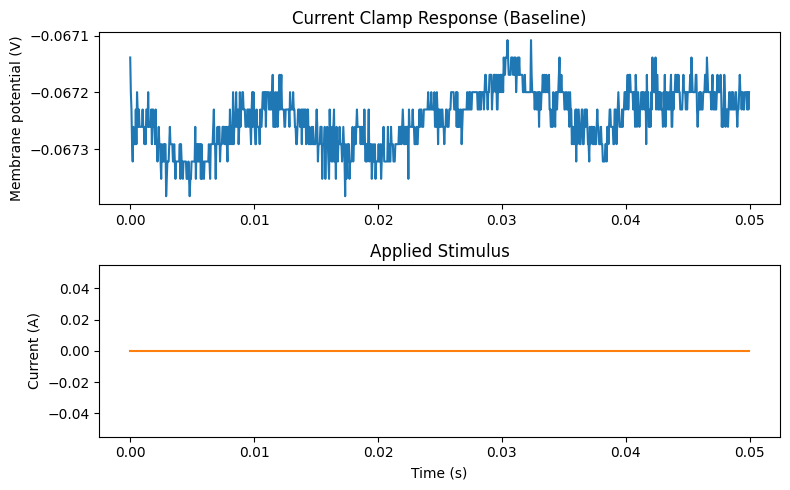

In [4]:
import numpy as np
import matplotlib.pyplot as plt

resp = nwb.acquisition["current_clamp-response-01-ch-0"]
stim = nwb.stimulus["stimulus-01-ch-0"]
n = 1000  # samples; <0.05s at 20kHz
resp_data = resp.data[:n] * resp.conversion
stim_data = stim.data[:n] * stim.conversion
rate = resp.rate
t = np.arange(n) / rate

plt.figure(figsize=(8, 5))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(t, resp_data, label='Membrane Potential')
ax1.set_ylabel('Membrane potential (V)')
ax1.set_title('Current Clamp Response (Baseline)')
ax2 = plt.subplot(2, 1, 2)
ax2.plot(t, stim_data, color='tab:orange', label='Stimulus')
ax2.set_ylabel('Current (A)')
ax2.set_xlabel('Time (s)')
ax2.set_title('Applied Stimulus')
plt.tight_layout()
plt.show()

In this ~50 ms segment, the membrane potential exhibits resting noise. No stimulus is delivered (current trace is zero).

## Visualization: Evoked response to a sustained current injection

Now let's focus on a segment where a strong, sustained current pulse is applied, using information from exploratory analysis above.

**Pulse window:** Samples 20,000 to 65,000 (1.0–3.25 s)


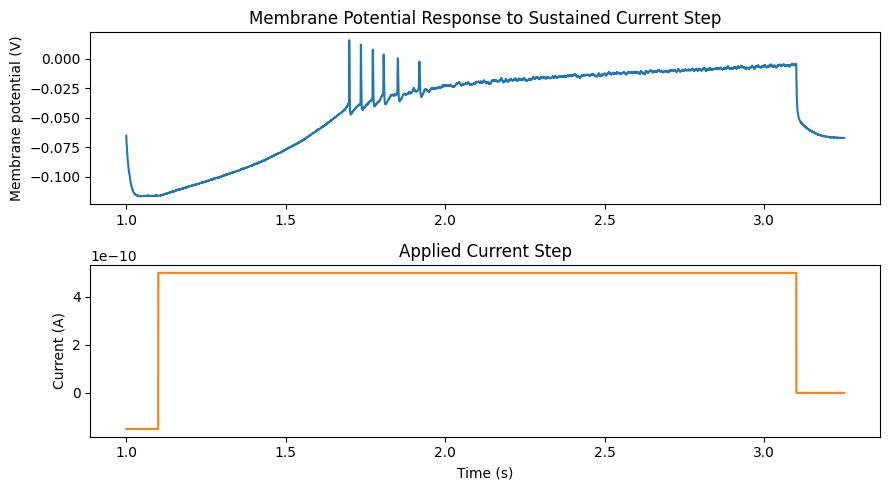

In [5]:
ix1 = 20000
ix2 = 65000
resp_data = resp.data[ix1:ix2] * resp.conversion
stim_data = stim.data[ix1:ix2] * stim.conversion
rate = resp.rate
t = np.arange(ix1, ix2) / rate

plt.figure(figsize=(9, 5))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(t, resp_data, label='Membrane Potential')
ax1.set_ylabel('Membrane potential (V)')
ax1.set_title('Membrane Potential Response to Sustained Current Step')
ax2 = plt.subplot(2, 1, 2)
ax2.plot(t, stim_data, color='tab:orange', label='Stimulus')
ax2.set_ylabel('Current (A)')
ax2.set_xlabel('Time (s)')
ax2.set_title('Applied Current Step')
plt.tight_layout()
plt.show()

This plot demonstrates a **clear evoked response**: the cell depolarizes in response to the injected current, producing a train of action potentials (spikes), then adapts and returns toward baseline after the step ends.

The current stimulus shows a pronounced step, consistent with a typical stimulation protocol in intracellular electrophysiology.

This type of trace illustrates how individual neurons can be driven to spike by controlled current injection, a foundation for exploring neuronal properties such as excitability.

## Summary and future directions

In this notebook, we explored the structure and example data from Dandiset 001354, including how to:
- Connect and browse a Dandiset programmatically
- Identify and load neurophysiology data stored as NWB files
- Navigate the internal organization and key series in an experimental NWB dataset
- Extract and visualize both baseline and evoked neuronal responses to current steps

**Next steps for analysis might include:**
- Comparing dynamics across different stimuli/pulses/trials or cells
- Quantitatively analyzing spike waveforms, firing rate adaptation, or membrane properties
- Cross-referencing metadata to group cells or conditions by experiment type
- Constructing summary statistics or tuning curves

> This notebook provides a template for further, more detailed, analysis. Be sure to critically check all code and outputs before publication or interpretation.